# Email Analysis for BASE Outreach Team


## Introduction

This project will look at data from BASE Search Marketing's Outreach team. All of the data was collected by myself, Cody Pulsipher. Much of it was collected in such a way that there is no need to clean or impute the data much. There also is not much of a need for feature engineering. Most of that work has been done before the data is read into this program. 

## BASE and Outreach 

BASE is a digital marketing agency that specializes in link building. It is still a young company and is quickly growing. With the current growth, it currently stands in great need of expanding its partnership database in order to bring on new clients and handle more orders. 

The partnerships that BASE works with are acquired by the Outreach team. A partnership is simply a website that we have established a long-term relationship where we submit blog articles to them and they publish those articles on their site. 

Outreach has been going on since this company began, but only until recently (August 2018) has it becomes its own team. Since the inception of the team, we have been working hard to develop the most effective methods for acquiring partnerships. A huge part of the work that Outreach does is cold contacting email addresses associated with a website (be it a content editor, website owner, etc.) and trying to become regular contributors for their website's content pages. 

This project is designed to look at a variety of variables associated with these efforts in order to answer some the important questions listed below.

## Questions

- What can we learn from our data to improve our work moving forward?
- Would we be better off changing our Outreach tactics to more of a mass emailing campaign?
- What is working and what isn't?

- Can we develop an algorithm that will predict our new partnerships numbers for a given month? 
- Can we use the results of this project to implement a more robust data analysis program at BASE?

## Goal

My goal for this project is two-fold:
- 1. Develop an algorithm that will accurately predict the number of partners we could expect to gain from a given month's worth of emails. 
- 2. Study and explore the model to learn how our variables relate to our target (response rate and partnership conversion) so we can improve our Outreaching methods. 

## Process

This project will be very much 'learn as you go', but my plan is to first analyze the data associated with our current partners. I will use what I learn from that data to help me understand which data I should mine from our Outreach database. It is time consuming to collect data at this stage because we have not been tracking important variables until now. 

I will need to use our current CRM to collect as much data as possible. The variables I choose to analyze at the end will end up being the most relevant and available variables that I feel will provide the answers to the questions we are trying to answer. 

## Table of Contents

- [Learning from Current Partnership Data](#1)
    - [Exploring the Data](#2)
    - [Important Observations](#3)
    - [Moving Foward](#4)
- [Outreach Data Aug 2018 - Feb 2019](#5)
    - [Import the Data](#6)
    - [Description of Variables](#7)
    - [Verifying that the Data is Clean](#8)
- [Exploring Models](#11)
    - [Addressing the Inbalance](#12)
    - [Testing on Past Data](#13)
- [Predicting March Partner Acquisition](#14)
    - [Setting Up the New Data](#15)
    - [Testing and Tuning Without Oversampling](#16)
    - [Oversampling and Weighting](#17)
    - [Predicting for March](#18)
    - [Re-adjusting Data and Re-evaluating the Model](#19)
    - [The Final Model... For Now](#21)
- [Conclusions](#20)

In [1]:
#Importing packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm, skew 
from scipy.stats import uniform as sp_rand
import time

#Silencing deprication warnings
import warnings
warnings.filterwarnings("ignore")

#Import libraries for modeling and validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score, roc_curve, auc, classification_report, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler

<a name="1"></a>

# Learning from Current Partnership Data 

I really want to explore as much data as possible that relate to our current partnerships. As I explore this data, I hope to see which variables are most important. As I mentioned earlier, collecting data from our CRM is very costly at this point, so I will need to be careful how I proceed in order to create a model that provides the most useful information to help us improve the team. 

I am the most experienced Outreacher at the company right now. I am choosing which variables to analyze based off of my own experience and inference, but also limited to what I am able to collect. This section will be exploring what I have collected and analyzing how I need to change the data in order to create my model for the project. 

<a name="2"></a>

## Exploring the Data 

In [2]:
#importing data collected from our current email partnerships
BASE_Current_Partners = pd.read_excel(
    "file:///Users/codypulsipher/Documents/Pythondocs/BASE_CurrentPartnersData.xlsx")

In [3]:
BASE_Current_Partners.head()

,Name,Pen Name,DA,Publish Time,Category,Word Count,Type,Gender,name_race,pic_race,...,Time_Sent,Day_Sent,Day_Month,Followup,Time_Followup,Day_Followup,Day_Month_Followup,Attempt_Number_Response,Negotiation,Partner
0,badyogi.com,Paisley Hansen,43,Longer than a Week,Fitness,650,Email,Female,White,White,...,20:04:00,Wednesday,13.0,0.0,NaN,NaN,NaN,1.0,NaN,yes
1,buckscountyalive.com,Paisley Hansen,31,Within a week,Home And Family,650,Email,Female,White,White,...,21:19:00,Tuesday,26.0,0.0,NaN,NaN,NaN,1.0,NaN,yes
2,indiebandguru.com,Devin Caldwell,41,Longer than a Week,Music and Dance,500,Email,Male,White,Latino,...,15:53:00,Tuesday,12.0,0.0,NaN,NaN,NaN,1.0,NaN,yes
3,travelguideline.net,Kevin Devoto,40,Within a week,Travel and Tourism,650,Email,Male,Latino,Latino,...,16:51:00,Wednesday,13.0,0.0,NaN,NaN,NaN,1.0,NaN,yes
4,takingthekids.com,Paisley Hansen,51,Longer than a Week,Travel and Tourism,650,Email,Female,White,White,...,14:10:00,Monday,28.0,0.0,NaN,NaN,NaN,1.0,NaN,yes


In [4]:
BASE_Current_Partners.columns

Index(['Name', 'Pen Name', 'DA', 'Publish Time', 'Category', 'Word Count',
       'Type', 'Gender ', 'name_race', 'pic_race', 'pic_age', 'Medium',
       'Subline', 'Spe_Subline', 'Subline_Chars', 'Subline_Spe', 'Approach',
       'Article_subtype', 'Personalized', 'Paragraphs', 'Char_Count',
       'Sample_Links', 'Pro_Exp', 'Edu', 'Blogger', 'Time_Sent', 'Day_Sent',
       'Day_Month', 'Followup', 'Time_Followup', 'Day_Followup',
       'Day_Month_Followup', 'Attempt_Number_Response', 'Negotiation',
       'Partner'],
      dtype='object')

I will not go into detail on what all of these variables are at this point. In the next section, I will provide details on the final variables that I decided to include for this analysis.  

In [5]:
#Showing number of rows and columns
BASE_Current_Partners.shape

(121, 35)

This data has a lot of missing values, mostly because of the large portion of partners that were found before Streak (our CRM) was being used at BASE. I will have to drop all of the data from the partners that came over from 97th Floor. It is too costly and maybe impossible to get data on the outreach efforts that they used to acquire those partners several years ago. 

In [6]:
#Creating new dataframe 
Streak = BASE_Current_Partners.copy()

In [7]:
#Only including values that aren't marked as 97th, which means data was unavailable
Streak = Streak[Streak.Medium != '97th']

We have 121 email partners, 72 of which were found after BASE implemented Streak into their company. Streak has allowed us to track some email data, so I will provide some summary statistics on this data that will help me understand which data I should collect from our Outreach efforts over the past several months.

In [8]:
#Displaying the different ways we have used email-type data to contact websites
Streak.Medium.unique()

array(['email', 'contact form', 'application'], dtype=object)

In [9]:
print("Number of Contact Forms: ",(Streak.Medium == 'contact form').sum())
print("Number of Applications:  ",(Streak.Medium == 'application').sum())
print("Number of Emails:        ",(Streak.Medium == 'email').sum())

Number of Contact Forms:  12
Number of Applications:   8
Number of Emails:         52


A vast majority of the data for the contact forms and online applications were unavailable, so I will be dropping them from the data frame to prevent that missing data from providing false summary statistics. It is good to know the proportion of our partners that have come from contact forms and emails, but since the rest of the data tied to these particular partners is null, they need to be dropped. 

In [10]:
Emails = (Streak[Streak.Medium == 'email']).copy()
Streak.shape

(72, 35)

In [11]:
Emails.shape

(52, 35)

<a name="3"></a>

## Important Observations

All of the data that I will be looking at in this section is data from emails that have converted websites into partnerships. All the variables are winners, but I want to see if some are more common than others. 

count      52.000000
mean      681.846154
std       273.816769
min       184.000000
25%       493.750000
50%       678.000000
75%       833.750000
max      1750.000000
Name: Char_Count, dtype: float64


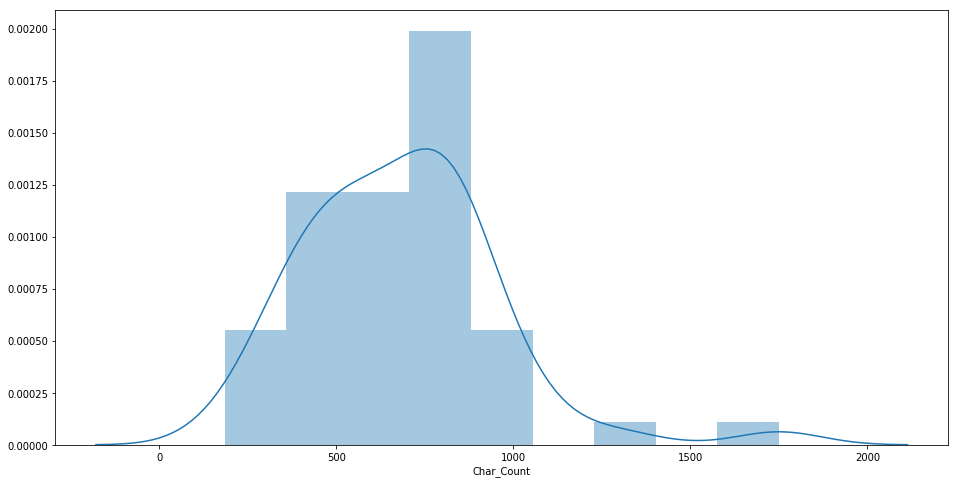

In [12]:
#Looking at the distribution of the character count of the initial outreach emails sent
f, ax = plt.subplots(figsize=(16, 8))
print(Emails.Char_Count.describe())
sns.distplot(Emails.Char_Count)

It looks like the majority of the emails that converted to partners were 800 characters or less. This is a good indication that we should be testing on shorter emails rather than longer.

I want to see if there is a particular day of the week or time of the day that is more common among the current partners that we have found. To do this, I will edit my data frame to look at the data for the emails that received a response. I tracked the data for the initial emails sent and the follow up emails that received the first response. They are labeled differently, so the new data frame will have all the date and time data for the email that received a response, not necessarily the first email that we sent. 

In [13]:
emailsdt = Emails.copy()

In [14]:
#Iterating through the rows to change the data so that the following plot reflects the emails that received a response
for index, row in emailsdt.iterrows():
    if row.Followup != 0.0:
        emailsdt.set_value(index, 'Time_Sent', row.Time_Followup)
        emailsdt.set_value(index, 'Day_Sent', row.Day_Followup)
        emailsdt.set_value(index, 'Day_Month', row.Day_Month_Followup)

Text(0.5, 1.0, 'Emails Sent By Day Of The Week')

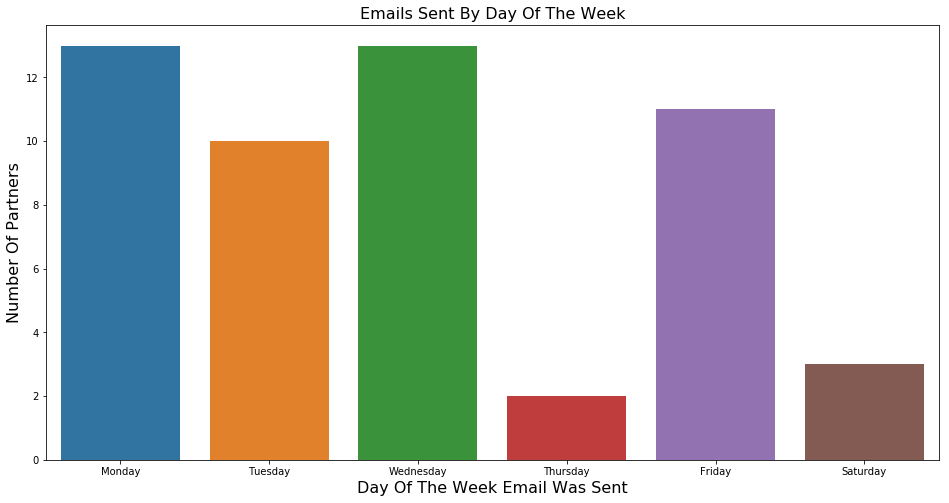

In [15]:
key = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
f, ax = plt.subplots(figsize=(16, 8))
sns.countplot(x = 'Day_Sent', data=emailsdt, order = key)
plt.xlabel('Day Of The Week Email Was Sent', fontsize=16)
plt.ylabel('Number Of Partners', fontsize=16)
plt.title('Emails Sent By Day Of The Week', fontsize=16)

This data looks like it has more to do with our outreachers' schedules rather than indicating which weekday may be more effective for sending outreach emails. However, we rarely send emails out on Saturday, so to see a decent number of email conversions from Saturday leads me to believe that weekend emails are more effective than weekday emails. This will be something I will test for and analyze. My theory is that emails sent on Saturday and Sunday will be more effective for the kind of outreach we are doing. 

It is also interesting to see how low Thursday is. This could mean emails tend to get lost in inboxes on Thursdays, but more likely just means that we don't send a lot of emails on Thursday. The data we will collect moving forward should shed more light on this. 

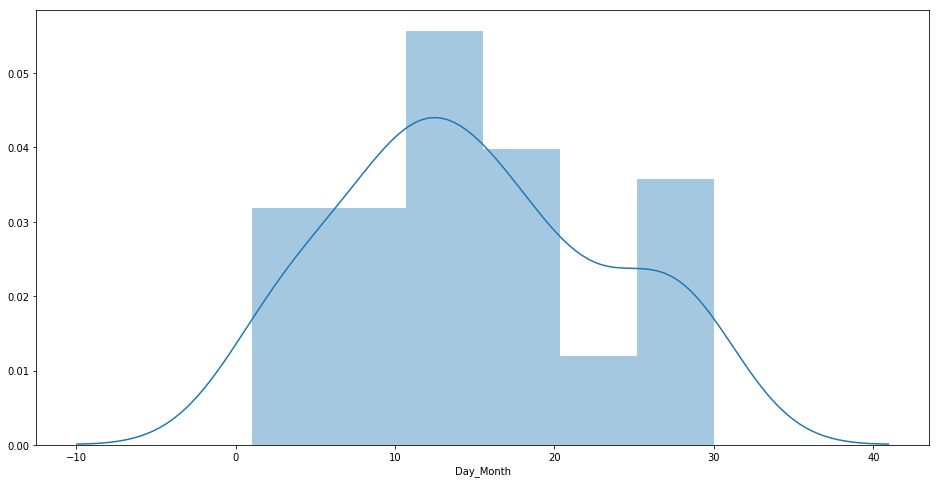

In [16]:
#Looking at the distribution of the day of the month the emails were sent
f, ax = plt.subplots(figsize=(16, 8))
sns.distplot(emailsdt.Day_Month)

More of our partners were converted from emails sent toward the middle and later parts of the month, although there isn't a large difference in the distribution between the time of the month. I would guess that conversion has more to do with the day of the week and the time the email was sent than the day of the month it was sent. 

In [17]:
emailsdt.Subline.unique()

array(['Other', 'Guest ', 'Fan', 'Sub/Cont', 'Guest', 'Inquiry', 'Title',
       'Sitename'], dtype=object)

In [18]:
#Iterating through the rows to fix the Guest marker
for index, row in emailsdt.iterrows():
    if row.Subline == 'Guest ':
        emailsdt.set_value(index, 'Subline', 'Guest')
emailsdt.Subline.unique()

array(['Other', 'Guest', 'Fan', 'Sub/Cont', 'Inquiry', 'Title',
       'Sitename'], dtype=object)

Text(0.5, 1.0, 'Subject Line Category Frequency')

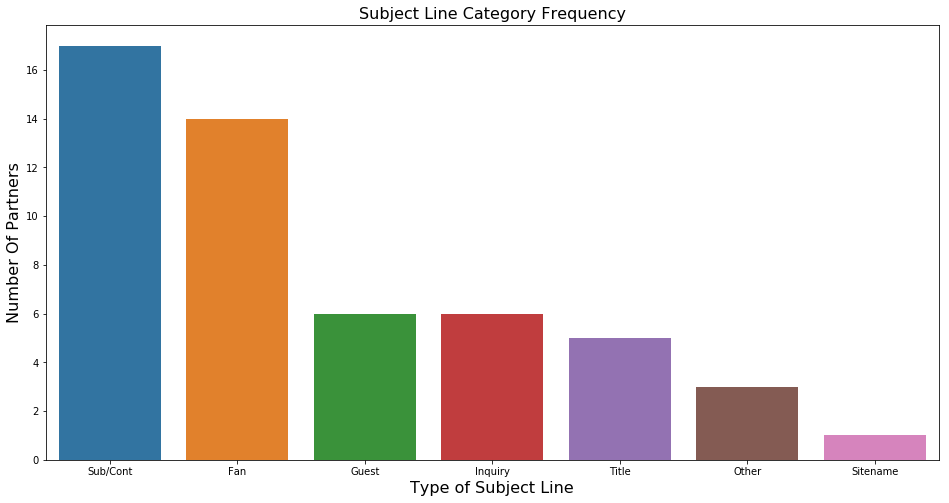

In [19]:
#Plotting the frequency of subject line categories used in outreach efforts
f, ax = plt.subplots(figsize=(16, 8))
sns.countplot(x = 'Subline', data=emailsdt, order=emailsdt.Subline.value_counts().index)
plt.xlabel('Type of Subject Line', fontsize=16)
plt.ylabel('Number Of Partners', fontsize=16)
plt.title('Subject Line Category Frequency', fontsize=16)

This data gives me a good idea of what works, but the question is how well they work. I believe Sub/Cont is so high because we have a much higher volume of emails that use that kind of subject line.

In [20]:
emailsdt.Subline_Spe.unique()

array(['None', 'CAPS', 'CAPS + Emoji', 'CAPS + Punctuation',
       'Punctuation'], dtype=object)

Text(0.5, 1.0, 'Subject Line Special Characters Frequency')

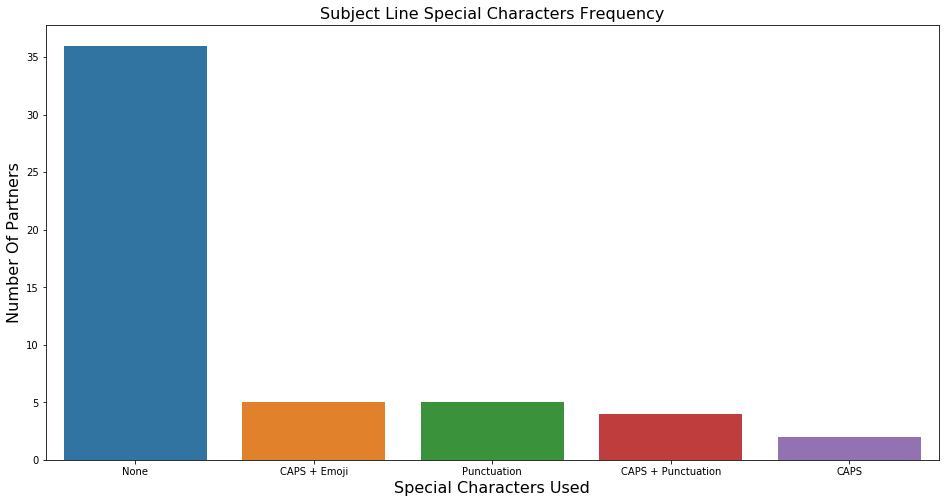

In [21]:
#Plotting the frequncy of certain special characters used in the subject line
f, ax = plt.subplots(figsize=(16, 8))
sns.countplot(x = 'Subline_Spe', data=emailsdt, order=emailsdt.Subline_Spe.value_counts().index)
plt.xlabel('Special Characters Used', fontsize=16)
plt.ylabel('Number Of Partners', fontsize=16)
plt.title('Subject Line Special Characters Frequency', fontsize=16)

For the most part, we don't use special characters in our subject lines. The analysis should show some insight on whether or not it is more effective to use this stuff than not.

In [22]:
#Creating new data frame that classifies Subline_Spe as either None or Spe_Char
subspe = emailsdt.copy()
for index, row in subspe.iterrows():
    if row.Subline_Spe != 'None':
        subspe.set_value(index, 'Subline_Spe', 'Spe_Char')
subspe.Subline_Spe.unique()

array(['None', 'Spe_Char'], dtype=object)

Text(0.5, 1.0, 'Subject Line Special Characters Frequency')

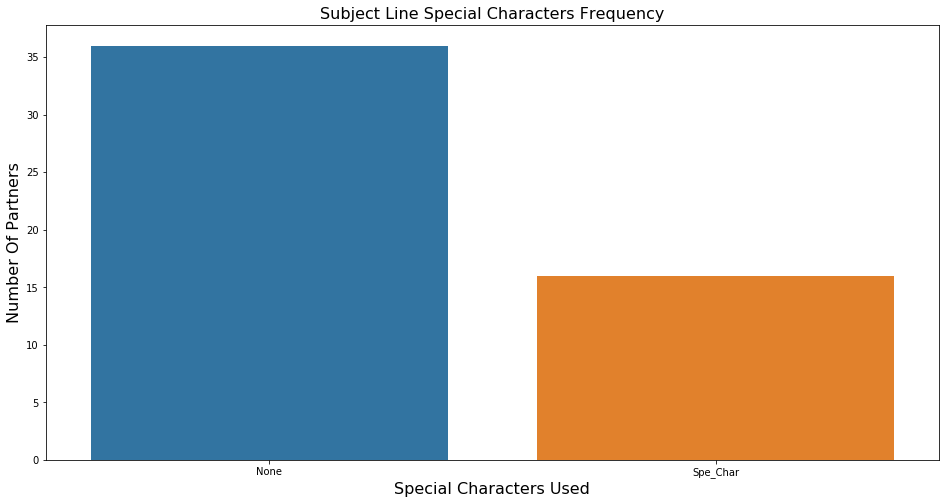

In [23]:
#Plotting the frequency of not using special characters and using special characters
f, ax = plt.subplots(figsize=(16, 8))
sns.countplot(x = 'Subline_Spe', data=subspe, order=subspe.Subline_Spe.value_counts().index)
plt.xlabel('Special Characters Used', fontsize=16)
plt.ylabel('Number Of Partners', fontsize=16)
plt.title('Subject Line Special Characters Frequency', fontsize=16)

Perhaps including special characters doesn't affect the likelihood of converting into a partner, but it is still something I want to analyze later on. 

Now I will look at the general approach we used in the body of the email. 

In [24]:
#The data is a bit messy here, I need to fix the extra space after some of the inquiry markers
emailsdt.Approach.unique()

array(['inquiry ', 'article', 'pitch', 'inquiry', 'issue', 'history',
       'marketer'], dtype=object)

In [25]:
#Iterating through the rows to fix the inquiry marker
for index, row in emailsdt.iterrows():
    if row.Approach == 'inquiry ':
        emailsdt.set_value(index, 'Approach', 'inquiry')
emailsdt.Approach.unique()

array(['inquiry', 'article', 'pitch', 'issue', 'history', 'marketer'],
      dtype=object)

Text(0.5, 1.0, 'Approach Category Frequency')

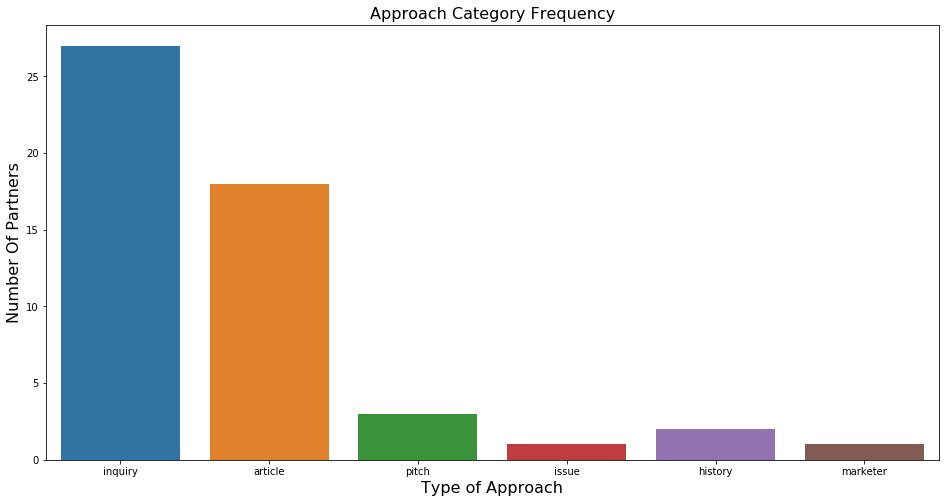

In [26]:
#Plotting the frequency of each approach category
f, ax = plt.subplots(figsize=(16, 8))
sns.countplot(x = 'Approach', data=emailsdt)
plt.xlabel('Type of Approach', fontsize=16)
plt.ylabel('Number Of Partners', fontsize=16)
plt.title('Approach Category Frequency', fontsize=16)

An important insight from this chart is how high article is relative to the other categories. We don't typically include articles in our first emails, so this data is already starting to provide valuable information on how we can improve our Outreach efforts. 

Now I will look at the breakdown of different key variables included in the body of the emails, like sample links to past blogging work or a mention of education. 

In [27]:
#Looking at the percentage of emails that contained key variables
print('---Percentage of emails that contained a key variable---')
print('Professional Experience: ',
      "%.2f" % ((emailsdt.Pro_Exp == 'yes').sum()/52*100), '%')
print('Education              : ',
      "%.2f" % ((emailsdt.Edu == 'yes').sum()/52*100), '%')
print('Professional Writing   : ',
      "%.2f" % ((emailsdt.Blogger == 'yes').sum()/52*100), '%')
print('Sample Links           : ',
      "%.2f" % ((emailsdt.Sample_Links == 'yes').sum()/52*100), '%')
print('Personalized to Site   : ',
      "%.2f" % ((emailsdt.Personalized == 'yes').sum()/52*100), '%')

---Percentage of emails that contained a key variable---
Professional Experience:  36.54 %
Education              :  9.62 %
Professional Writing   :  50.00 %
Sample Links           :  42.31 %
Personalized to Site   :  50.00 %


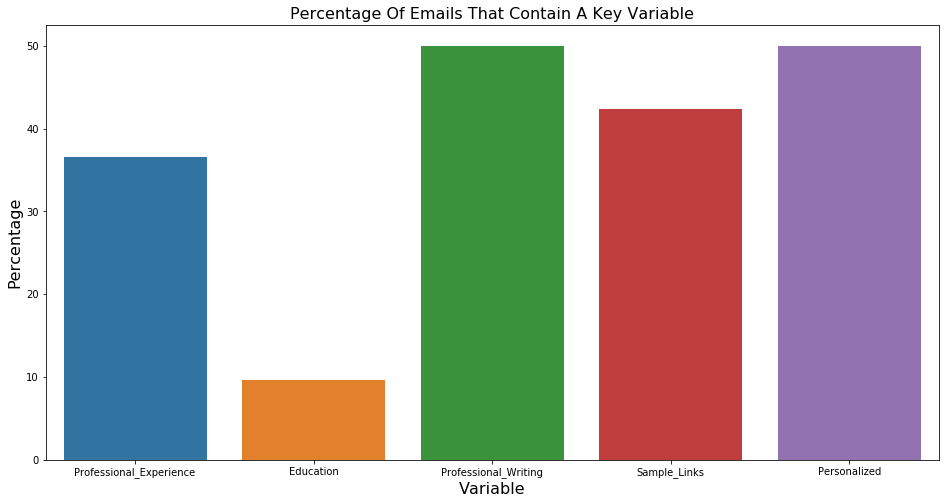

In [28]:
#Plotting percentage of emails that contained certain key variables
d = {'Variable': ['Professional_Experience', 'Education', 'Professional_Writing', 'Sample_Links', 'Personalized'], 
     'Percentage': [36.54, 9.62, 50, 42.31, 50]}
df = pd.DataFrame(data=d)
f, ax = plt.subplots(figsize=(16, 8))
plt.xlabel('Variable', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.title('Percentage Of Emails That Contain A Key Variable', fontsize=16)
sns.barplot(x = 'Variable', y = 'Percentage', data = df)

It is interesting to note the volume of emails that mentioned something specific about the website being contacted (personalized category). The other frequencies may or may not be providing useful information, that will be determined later on in the project. 

<a name="4"></a>

## Moving Forward

After observing this data, I got to work collecting data from our Outreach Team pipeline. I quickly discovered the limitations of our CRM when it comes to data tracking. Through a bit of frustration and creative thinking, I have decided to exclude any variables that analyze the content of our emails. It is too costly to go through each email and manually extract data. 

Streak allows me to track more superficial data, like data associated with the subject lines and time/dates that emails were sent and responded to. I do not think this will hurt my analysis in the end. Our biggest challenge is getting people to notice our emails and give them the time of day, so it is much more important what we do on the outside (subject lines, attachments, penname information, etc.) than on what we are actually including in the body of the emails. 

<a name="5"></a>

# Looking at all Outreach Data from August 2018 - February 2019

After putting together the data and considering the scope of this project, I decided to take a look at all of our Outreach email data from the inception of the team (August 2018) to February 2019 to develop a model that will be able to predict the number of partners we can expect to get from our Outreach efforts for a given month. I will use the current data we have to train the model and then test it on all of our data from March 2019. 

I ended up changing a lot of the variables, and excluding some variables that our CRM would not allow me to track from our past emails. I narrowed down the data to the most important variables available to include in our analysis. 

<a name="6"></a>

## Import Data

In [29]:
#importing data collected from Outreach emails August 2018 - February 2019
train = pd.read_excel("file:///Users/codypulsipher/Documents/Pythondocs/data.xlsx")

In [30]:
pd.options.display.max_columns = 50
train.head()

,Gender,Race_name,Race_pic,Age,Name,Domain Type,DA,Category,Contact Email Type,Subject Line Type,Subject Line Spe,Punctuation,CAPS,Emoji,Article Included,Medium,Month,Day of Week,Hour of Day,Outreacher,Number of Emails,Response,Partner
0,Male,White,White,Middle,breakingtravelnews.com,.com,53,Travel and Tourism,na,Fan,Punctuation,1,0,0,0,Email,December,Wed,12,drewhunt,3,0,0
1,Male,White,White,Middle,sustainablebrands.com,.com,64,Business,editor,Fan,Punctuation,1,0,0,0,Email,December,Wed,12,drewhunt,4,0,0
2,Male,White,White,Young,wamda.com,.com,58,Business,editor,Fan,Punctuation,1,0,0,1,Email,January,Wed,23,drewhunt,2,1,0
3,Female,Latino,Latino,Middle,everydayfamily.com,.com,42,Home and Family,na,no subject,None,0,0,0,0,Write for Us / Contributor Form,January,Fri,10,drewhunt,1,0,0
4,Male,White,White,Middle,smallbusinessbible.org,.org,38,Business,na,no subject,None,0,0,0,0,Contact Us Form,November,Wed,14,drewhunt,1,0,0


In [31]:
train.describe()

,DA,Punctuation,CAPS,Emoji,Article Included,Hour of Day,Number of Emails,Response,Partner
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000
mean,46.033226,0.241158,0.156484,0.094319,0.109325,13.167203,2.052519,0.150054,0.103966
std,14.069263,0.428015,0.363509,0.292429,0.312214,3.197692,1.162923,0.357315,0.305380
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,0.000000,0.000000
50%,44.000000,0.000000,0.000000,0.000000,0.000000,13.000000,2.000000,0.000000,0.000000
75%,54.000000,0.000000,0.000000,0.000000,0.000000,15.000000,3.000000,0.000000,0.000000
max,94.000000,1.000000,1.000000,1.000000,1.000000,23.000000,9.000000,1.000000,1.000000


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 23 columns):
Gender                933 non-null object
Race_name             933 non-null object
Race_pic              933 non-null object
Age                   933 non-null object
Name                  933 non-null object
Domain Type           933 non-null object
DA                    933 non-null int64
Category              933 non-null object
Contact Email Type    933 non-null object
Subject Line Type     933 non-null object
Subject Line Spe      933 non-null object
Punctuation           933 non-null int64
CAPS                  933 non-null int64
Emoji                 933 non-null int64
Article Included      933 non-null int64
Medium                933 non-null object
Month                 933 non-null object
Day of Week           933 non-null object
Hour of Day           933 non-null int64
Outreacher            933 non-null object
Number of Emails      933 non-null int64
Response            

<a name="7"></a>

## Description of Variables

**Independent Variables**<br>
- **Gender**: gender of the penname used for outreach
- **Race_name**: race of the penname as inferred by their name
- **Race_pic**: race of the penname as inferred by their gmail picture
- **Age**: age of the penname as inferred by their gmail picture
- **Name**: domain name of the website (this data will not be included in model)
- **Domain Type**: identifying the type of domain (.com, .net, .org, etc.)
- **DA**: Domain Authoirty (0-100). This is a score provide by MOZ estimating the strength of a website in Google SERPs
- **Category**: identifies the type of content published on the site
- **Contact Email Type**: indicates the type of email contacted (info@example, editor@example, etc.)
- **Subject Line Type**: approach used in the subject line
- **Subject Line Spe**: (will be dropped, see below)
- **Punctuation, CAPS, Emoji**: boolean value indicating if any of these were used in the subject line
- **Article Included**: indicates if an article was included in the first outreach
- **Medium**: identifies how the contact was made, either through the website or through email
- **Month**: month outreach was initiated
- **Day of Week**: day of the week outreach was initiated
- **Hour of Day**: hour of the day outreach was initiated
- **Outreacher**: identifies the team member who did the outreach
- **Number of Emails**: the number of emails sent before a reponse was given (or effort was abandoned)

**Target Variables**<br>
- **Response**: indicates if the email received a real response (not automated)
- **Partner**: indicates if website converted into a partner

<a name="8"></a>

## Verifying that the Data is Clean

Since I was the one collecting the data, I made sure to do it in a way that provided a very clean data set to feed into my model. In this section, I will verify that my model is free of missing values and prepared for feature engineering and feeding into my model. 

In [33]:
#Setting target variables
partner = train.Partner
response = train.Response

In [34]:
data = train.copy()

In [35]:
#Checking for missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Partner,0,0.0
Subject Line Spe,0,0.0
Race_name,0,0.0
Race_pic,0,0.0
Age,0,0.0


In [36]:
#Dropping columns that I won't be using for model
data = data.drop(columns = ['Name','Subject Line Spe'])

<a name="11"></a>

# Exploring Models

In [43]:
tdata = data.copy()
tdata = tdata.drop(columns = ['Response','Partner','Contact Email Type', 'Number of Emails','Month'], axis = 1)

In [44]:
#Get dummy variables
tdata = pd.get_dummies(tdata)
tdata.shape

(933, 79)

In [45]:
x = tdata
y = partner

In [46]:
#Get a split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3)

In [47]:
#This is a function from ngriffiths13 that will get the macro-F1 score of the model, with CV = 10 instead of 5
def test_clf(clf):
    score = cross_val_score(clf, x, y, scoring = 'f1_macro', cv = 10)
    print(clf.__class__.__name__,"Score =", score.mean())

In [48]:
rf = RandomForestClassifier()
gnb = GaussianNB()

models = [rf, gnb]
for clf in models:
    test_clf(clf)

RandomForestClassifier Score = 0.5284774254696275
GaussianNB Score = 0.29107123433040444


In [49]:
#Hyperparameters are an adaptation of ngriffiths13 values. RandomSearchCV is time consuming, so this works.
rf_t = RandomForestClassifier(n_estimators= 200, min_samples_split= 4, 
                              max_features= 40, max_depth= 10, criterion= 'entropy')

rf_t.fit(x, y)
rf_t_pred = rf_t.predict(x_test)
score = f1_score(y_test, rf_t_pred, average = 'macro')
print('F1 Score: %s \n' %(score))

F1 Score: 0.7651663405088063 



In [50]:
#Train models and make predictions
rf_t.fit(x_train, y_train)
rf_t_pred = rf_t.predict(x_test)

In [51]:
rf_report = classification_report(y_test, rf_t_pred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       245
           1       0.80      0.11      0.20        35

   micro avg       0.89      0.89      0.89       280
   macro avg       0.84      0.56      0.57       280
weighted avg       0.88      0.89      0.85       280



In [52]:
rf_t_pred.sum()

5

In [53]:
#Creating a data frame that looks at the variables and their coefficients in this model
featuresRF = pd.DataFrame(columns = ['Variable', 'Coef'])
featuresRF['Variable'] = list(x)
#featuresRF['Coef'] = abs(rf_t.feature_importances_)
featuresRF['Coef'] = rf_t.feature_importances_
featuresRF.sort_values(by = 'Coef', ascending = False, inplace = True)
featuresRF = featuresRF[0:20]

Text(0.5, 1.0, 'Top 20 Variables in the Random Forest Classifier')

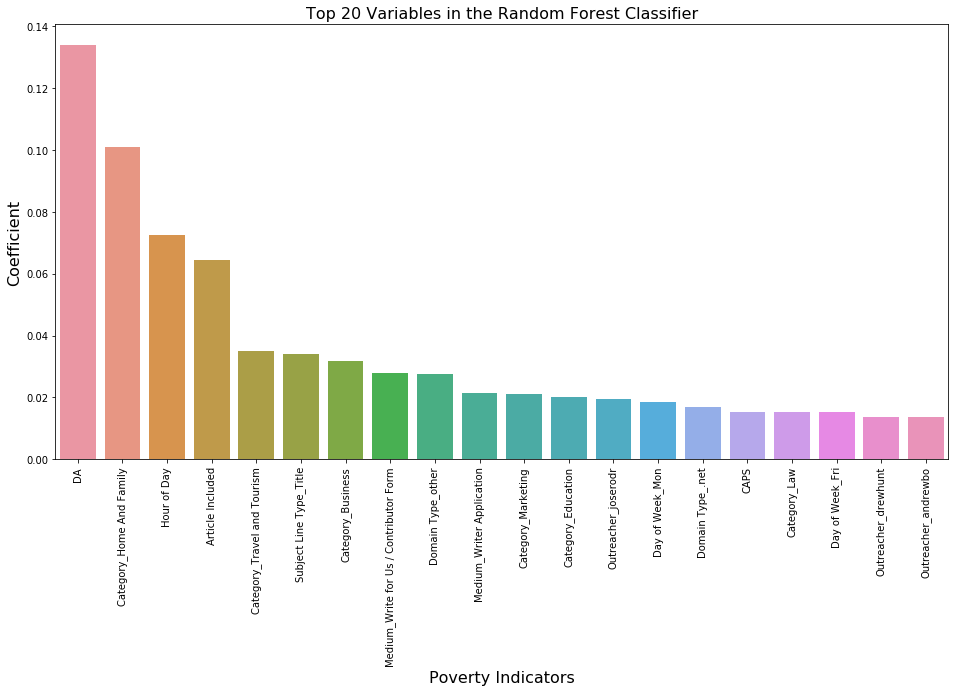

In [54]:
#Plotting the top 20 variables by their coefficient value
f, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation='90')
sns.barplot(x=featuresRF['Variable'], y = featuresRF['Coef'])
plt.xlabel('Poverty Indicators', fontsize=16)
plt.ylabel('Coefficient', fontsize=16)
plt.title('Top 20 Variables in the Random Forest Classifier', fontsize=16)

<a name="12"></a>

## Addressing the Inbalance 

Having a large inbalance in my target variable will cause my classification model to perform poorly. It is learning the 0 observations very well but it can't learn very much from the 1 observations. To address this, I will be using a specific method of oversampling called [SMOTE](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html) (Synthetic Minority Over-sampling Technique). I followed the kernel of [Nick Becker](https://beckernick.github.io/oversampling-modeling/), a Data Scientist for Enigma Technologies, who provided an excellent example on implementing SMOTE oversampling the correct way. In the following model, I am only oversampling on the training data, not the validation data. So when I go and test the model, it will only be tested on real data and not on any synthetic observations that were created for oversampling. 

In [55]:
#Oversampling with SMOTE
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                  test_size = .1,
                                                  random_state=12)

In [56]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [57]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)
clf_rf_pred = clf_rf.predict(x_test)

In [58]:
clf_rf_report = classification_report(y_test, clf_rf_pred)
print(clf_rf_report)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        88
           1       0.14      0.17      0.15         6

   micro avg       0.88      0.88      0.88        94
   macro avg       0.54      0.55      0.55        94
weighted avg       0.89      0.88      0.89        94



In [59]:
clf_rf_pred.sum()

7

Precision and Recall are low, but the estimation is only 1 off the real observations. For this particular model, I do not care that it predicts the correct observations to convert to Partners, but that it gives me the best estimate of the total amount of observations that will convert to Partners. Based off of this report, the model is doing a good job for what I want to observe. It will take a lot more data and comaprison with human predictions before I can understand if it is a good model or not, but for now I am on the right track. 

Text(0.5, 1.0, 'Top 20 Variables in the Random Forest Classifier with SMOTE')

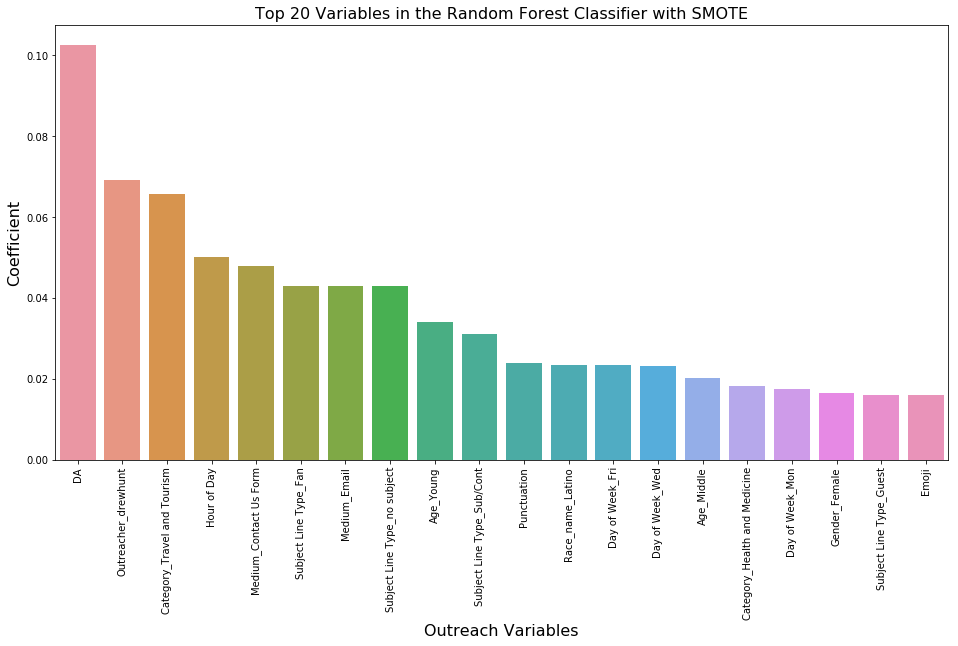

In [60]:
#Creating a data frame that looks at the variables and their coefficients in this model
featuresRF = pd.DataFrame(columns = ['Variable', 'Coef'])
featuresRF['Variable'] = list(x)
featuresRF['Coef'] = abs(clf_rf.feature_importances_)
#featuresRF['Coef'] = clf_rf.feature_importances_
featuresRF.sort_values(by = 'Coef', ascending = False, inplace = True)
featuresRF = featuresRF[0:20]

#Plotting the top 20 variables by their coefficient value
f, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation='90')
sns.barplot(x=featuresRF['Variable'], y = featuresRF['Coef'])
plt.xlabel('Outreach Variables', fontsize=16)
plt.ylabel('Coefficient', fontsize=16)
plt.title('Top 20 Variables in the Random Forest Classifier with SMOTE', fontsize=16)

In [61]:
featuresRF.head(20)

,Variable,Coef
0,DA,0.102480
74,Outreacher_drewhunt,0.069152
50,Category_Travel and Tourism,0.065757
5,Hour of Day,0.050168
58,Medium_Contact Us Form,0.047976
51,Subject Line Type_Fan,0.043037
59,Medium_Email,0.042977
57,Subject Line Type_no subject,0.042870
17,Age_Young,0.034127
55,Subject Line Type_Sub/Cont,0.031088


After discussing with a few of my team members the breakdown of the coefficients on these variables, we have concluded that the model seems to be doing what we would expect it to do. The Outreacher variables are causing me to question whether or not they should be included in the model because we will always be having Outreachers come in and out of the team, so that is something I will look at further down. 

<a name="13"></a>

## Testing on Past Data

I am going to split my data so that I have a training set on everything through January and a test set from work done in February. I think an appropriate amount of turn around time would be to 2 months to see whether or not Outreach efforts will convert to Partners, but Running an analysis on February should help give me a decent idea on how well the model is doing with a small amount of data. 

In [62]:
#Creating separate dataset that I will filter to only show Aug-Jan
xxfebdata = data.copy()

In [63]:
#Showing our current output numbers for each month since August
xxfebdata.groupby(['Month'])['Partner'].sum()

Month
August        0
December      9
February     12
January      18
March         1
November     19
October      19
September    19
Name: Partner, dtype: int64

In [64]:
#Creating dataset that I will filter to only show Feb
xxfebdata.shape

(933, 21)

In [65]:
febdata = data.copy()
febdata.shape

(933, 21)

In [66]:
febdata.shape

(933, 21)

In [67]:
febdata.Month.unique()

array(['December', 'January', 'November', 'October', 'August',
       'September', 'February', 'March'], dtype=object)

In [68]:
febdata.groupby(['Month'])['Partner'].sum()

Month
August        0
December      9
February     12
January      18
March         1
November     19
October      19
September    19
Name: Partner, dtype: int64

In [69]:
xxfebdata = xxfebdata.drop(columns = ['Contact Email Type', 'Number of Emails'], 
                           axis = 1)
febdata = febdata.drop(columns = ['Contact Email Type', 'Number of Emails'], 
                           axis = 1)

In [70]:
xxfebdata = pd.get_dummies(xxfebdata)
febdata = pd.get_dummies(febdata)
print(xxfebdata.shape)
print(febdata.shape)

(933, 89)
(933, 89)


In [71]:
for index, row in xxfebdata.iterrows():
    if row.Month_February == 1:
        xxfebdata.drop(index, inplace = True)

In [72]:
for index, row in febdata.iterrows():
    if row.Month_February == 0:
        febdata.drop(index, inplace = True)

In [73]:
xxfebdata = xxfebdata.drop(columns = ['Response','Month_August', 'Month_December', 'Month_February', 
                                      'Month_January',
       'Month_March', 'Month_November', 'Month_October', 'Month_September'], 
                           axis = 1)
febdata = febdata.drop(columns = ['Response','Month_August', 'Month_December', 'Month_February', 
                                  'Month_January',
       'Month_March', 'Month_November', 'Month_October', 'Month_September'], 
                           axis = 1)
print(xxfebdata.shape)
print(febdata.shape)

(706, 80)
(227, 80)


In [74]:
y = xxfebdata.Partner
xxfebdata = xxfebdata.drop(columns = ['Partner'])
febdata = febdata.drop(columns = ['Partner'])
x = xxfebdata

In [75]:
#Oversampling with SMOTE
x_train, x_val, y_train, y_val = train_test_split(x, y,
                                                  test_size = .1,
                                                  random_state=12)

In [76]:
#Training model on data that excludes february
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

xfeb_rf = RandomForestClassifier(n_estimators=25, random_state=12)
xfeb_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [77]:
xreal = febdata
#Predicition on February Data
feb_pred = xfeb_rf.predict(xreal)

In [78]:
feb_pred.sum()

7

February prediction was off by 5. I am not sure whether or not this is good or bad. I will have to compare it to our own team prediction. Hopefully the machine will do a better job than we can based off of our own inference. 

<a name="14"></a>

# Predicting March Partner Acquisition

During the course of this project, I have streamlined the data extraction process from Streak using Google Sheets. I will now import the new data, drop everything from March 2019 and on, and train on the data from August 2018 - 2019. In this section, I will also try out a few different models to see if anything is better than the Random Forest Classifier. I will still use SMOTE to address the inbalance in my data, but I might try some weighting and other methods to see if I can't improve my model. 

After I get my model put together, I will use it to predict our output from everything we did in March 2019. I will compare it to our human estimates and then compare the actual results after a couple of months. Hopefully the estimate will be close, if not then I may need to totally redo my model. If it is reasonably close, I can be confident that it will continue to improve as more and more data becomes available to us.  

<a name="15"></a>

## Setting Up the New Data

In [79]:
train = pd.read_excel("file:///Users/codypulsipher/Documents/Pythondocs/StreakDATA.xlsx")

In [80]:
#Checking to see that the data looks good
train.head()

,Gender,Race_name,Race_pic,Age,Name,Domain Type,DA,Category,Contact Email Type,Subject Line Type,Punctuation,CAPS,Emoji,Article Included,Medium,MonthYr,Day of Week,Hour of Day,Outreacher,Response,Partner
0,Female,White,White,Middle,creativeoverflow.net,.net,52,Arts and Crafts,na,Fan,0,1,1,1,Email,April19,Wed,12,joserodr,0,0
1,Male,Latino,Latino,Young,laughtard.com,.com,39,Travel and Tourism,na,Guest,0,0,0,0,Contact Us Form,April19,Tue,19,williamd,0,0
2,Female,White,White,Middle,get-a-wingman.com,.com,45,Health and Medicine,na,Inquiry,0,0,0,0,Email,April19,Tue,19,williamd,0,0
3,Female,White,White,Middle,becomegorgeous.com,.com,63,Health and Medicine,name,Inquiry,0,0,0,0,Email,April19,Tue,18,williamd,0,0
4,Female,White,White,Middle,seniordirectory.com,.com,38,Health and Medicine,info,Guest,0,0,0,0,Email,April19,Tue,18,williamd,0,0


In [81]:
#Making sure all of my columns imported correctly
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 21 columns):
Gender                1237 non-null object
Race_name             1237 non-null object
Race_pic              1237 non-null object
Age                   1237 non-null object
Name                  1237 non-null object
Domain Type           1237 non-null object
DA                    1237 non-null int64
Category              1237 non-null object
Contact Email Type    1237 non-null object
Subject Line Type     1237 non-null object
Punctuation           1237 non-null int64
CAPS                  1237 non-null int64
Emoji                 1237 non-null int64
Article Included      1237 non-null int64
Medium                1237 non-null object
MonthYr               1237 non-null object
Day of Week           1237 non-null object
Hour of Day           1237 non-null int64
Outreacher            1237 non-null object
Response              1237 non-null int64
Partner               1237 non-null int6

In [82]:
#Looking at the time range of current data
train.MonthYr.unique()

array(['April19', 'March19', 'February19', 'January19', 'December18',
       'October18', 'September18', 'November18', 'August18'], dtype=object)

In [83]:
#Becuase we are missing so much of this data, I am dropping contact email type
#I will also drop Response since that is not something I want to look at right now, or include
#I will also drop Name since that is not needed here
train = train.drop(columns = ['Contact Email Type','Response','Name'])

In [84]:
#Getting dummy variables to ensure that when I split my training data from my test data, they are compatible 
train = pd.get_dummies(train)
print(train.shape)
#Removing April19 from data since it is not relevant to my current analysis
for index, row in train.iterrows():
    if row.MonthYr_April19 == 1:
        train.drop(index, inplace = True)
print(train.shape)

(1237, 93)
(1212, 93)


In [85]:
#Creating test data set for March
march = train.copy()

for index, row in march.iterrows():
    if row.MonthYr_March19 == 0:
        march.drop(index, inplace = True)
march.shape

(272, 93)

In [86]:
#Dropping March from the training data
for index, row in train.iterrows():
    if row.MonthYr_March19 == 1:
        train.drop(index, inplace = True)
train.shape

(940, 93)

<a name="16"></a>

## Testing and Tuning Without Oversampling

In [87]:
#Setting target and data variables and dropping the target variable from my training data
y = train.Partner
train = train.drop(columns = ['Partner'])
x = train

In [88]:
#Get splitting training data into a train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3)

In [89]:
#This is a function from ngriffiths13 that will get the macro-F1 score of the model, with CV = 10 instead of 5
def test_clf(clf):
    score = cross_val_score(clf, x, y, scoring = 'f1_macro', cv = 10)
    print(clf.__class__.__name__,"Score =", score.mean())

In [90]:
rf = RandomForestClassifier()
lgb = LGBMClassifier()
knn = KNeighborsClassifier()
svc = SVC()
gnb = GaussianNB()

models = [rf, lgb, knn, svc, gnb]
for clf in models:
    test_clf(clf)

RandomForestClassifier Score = 0.5028406575019697
LGBMClassifier Score = 0.5095993832101486
KNeighborsClassifier Score = 0.46799994500089576
SVC Score = 0.47161455509840733
GaussianNB Score = 0.2578629332689672


Some of these scored pretty similarly, the best f1_macro scores comes from the LGBM and the RF classifiers

In [91]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [92]:
lgb.get_params

<bound method LGBMModel.get_params of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>

In [93]:
#Setting params for randomized search hyperparameter tuning
params = {'rf' : {'n_estimators' : np.arange(100,2000,100),
                  'criterion' : ['gini', 'entropy'],
                  'min_samples_split' : np.arange(2, 5, 1),
                  'max_features' : np.arange(10, 50, 10),
                  'max_depth' : np.arange(3, 10, 1)},
          'lgb' : {'n_estimators' : np.arange(100,2000,100),
                  'num_leaves' : np.arange(25, 40, 1),
                  'max_depth' : np.arange(-5, 10, 1),
                  'boosting_type' : ['gbdt','gbrt','dart','goss']}
         }

In [94]:
#Function taken from ngriffiths13
def tune_params(clf, params):
    clf_rs = RandomizedSearchCV(clf, param_distributions = params, n_iter = 20, scoring = 'f1_macro', verbose=1)
    clf_rs.fit(x, y)
    clf_rs_pred = clf_rs.predict(x_test)
    score = f1_score(y_test, clf_rs_pred, average = 'macro')
    print('F1 Score: %s \n' %(score))
    print('Best Parameters:',clf_rs.best_params_)

In [95]:
#rf = tune_params(rf, params['rf'])
#Best Parameters: {'n_estimators': 1300, 'min_samples_split': 4, 'max_features': 10, 'max_depth': 8, 
# 'criterion': 'gini'}

In [96]:
#Tuning hyperparameters of the RF classifier. Numbers taken from ngriffiths13
rf = RandomForestClassifier(n_estimators = 200, min_samples_split = 3, max_features = 30, 
                            max_depth = 6, criterion = 'gini')
test_clf(rf)

RandomForestClassifier Score = 0.4893905075282988


In [97]:
#lgb = tune_params(lgb, params['lgb'])
#Best Parameters: {'num_leaves': 39, 'n_estimators': 400, 'max_depth': 4, 'boosting_type': 'gbrt'}

In [98]:
#Tuning hyperparameters of the RF classifier. Numbers taken from ngriffiths13
lgb = LGBMClassifier(num_leaves = 39, n_estimators = 1400, boosting_type = 'dart', 
                            max_depth = 3)
test_clf(lgb)

LGBMClassifier Score = 0.514242960101635


The RF model improved a bit, but I can't get the randomizedsearch to improve the LGBM classifier, so I will leave it with its default parameters.

In [99]:
lgb = LGBMClassifier()

In [100]:
#Training models and making predictions
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
lgb.fit(x_train, y_train)
lgb_pred = lgb.predict(x_test)
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)

In [101]:
rf_report = classification_report(y_test, rf_pred)
print('RF REPORT\n',rf_report,'\nPartners Predicted: ',rf_pred.sum(),'\n')

knn_report = classification_report(y_test, knn_pred)
print('KNN REPORT\n',knn_report,'\nPartners Predicted: ',knn_pred.sum(),'\n')

lgb_report = classification_report(y_test, lgb_pred)
print('LGB REPORT\n',lgb_report,'\nPartners Predicted: ',lgb_pred.sum(),'\n')

svc_report = classification_report(y_test, svc_pred)
print('SVC REPORT\n',svc_report,'\nPartners Predicted: ',svc_pred.sum(),'\n')

gnb_report = classification_report(y_test, gnb_pred)
print('GNB REPORT\n',gnb_report,'\nPartners Predicted: ',gnb_pred.sum(),'\n')

RF REPORT
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       254
           1       0.00      0.00      0.00        28

   micro avg       0.90      0.90      0.90       282
   macro avg       0.45      0.50      0.47       282
weighted avg       0.81      0.90      0.85       282
 
Partners Predicted:  0 

KNN REPORT
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       254
           1       0.00      0.00      0.00        28

   micro avg       0.89      0.89      0.89       282
   macro avg       0.45      0.50      0.47       282
weighted avg       0.81      0.89      0.85       282
 
Partners Predicted:  2 

LGB REPORT
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       254
           1       0.14      0.04      0.06        28

   micro avg       0.88      0.88      0.88       282
   macro avg       0.52      0.51      0.

These all performed pretty terribly, but LGB predicted closer than any of the others. Enough playing around--it's time to address the unbalanced data.

<a name="17"></a>

## Oversampling and Weighting

In [102]:
#Oversampling with SMOTE
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .1, random_state=12)

In [103]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [104]:
#Recreating function that uses SMOTE training data
def tune_params(clf, params):
    clf_rs = RandomizedSearchCV(clf, param_distributions = params, n_iter = 33, scoring = 'f1_macro', verbose=1)
    clf_rs.fit(x_train_res, y_train_res)
    clf_rs_pred = clf_rs.predict(x_test)
    score = f1_score(y_test, clf_rs_pred, average = 'macro')
    print('F1 Score: %s \n' %(score))
    print('Best Parameters:',clf_rs.best_params_)

In [105]:
#rf = tune_params(rf, params['rf'])

#Best Parameters: {'n_estimators': 1200, 'min_samples_split': 3, 'max_features': 30, 'max_depth': 9, 
# 'criterion': 'entropy'}

In [106]:
rf = RandomForestClassifier(n_estimators = 1200, min_samples_split = 3, max_features = 30, 
                            max_depth = 9, criterion = 'entropy')
rf.fit(x_train_res, y_train_res)
rf_pred = rf.predict(x_test)

In [107]:
rf_report = classification_report(y_test, rf_pred)
print('RF REPORT\n',rf_report,'\nPartners Predicted: ',rf_pred.sum(),'\n')

RF REPORT
               precision    recall  f1-score   support

           0       0.91      0.94      0.92        83
           1       0.38      0.27      0.32        11

   micro avg       0.86      0.86      0.86        94
   macro avg       0.64      0.61      0.62        94
weighted avg       0.84      0.86      0.85        94
 
Partners Predicted:  8 



In [108]:
weights = {0:1, 1:2}
rf_weighted = RandomForestClassifier(n_estimators = 1600, min_samples_split = 4, max_features = 30, max_depth = 9,
                                     criterion = 'gini', class_weight = weights)
rf_weighted.fit(x_train_res, y_train_res)
rf_weighted_pred = rf_weighted.predict(x_test)
rf_weighted_report = classification_report(y_test, rf_weighted_pred)
print('----- ORIGINAL CLASSIFICATION REPORT -----\n')
print('RF REPORT\n',rf_report,'\nPartners Predicted: ',rf_pred.sum(),'\n')
print('----- WEIGHTED CLASSIFICATION REPORT -----\n')
print('RF REPORT\n',rf_weighted_report,'\nPartners Predicted: ',rf_weighted_pred.sum(),'\n')

----- ORIGINAL CLASSIFICATION REPORT -----

RF REPORT
               precision    recall  f1-score   support

           0       0.91      0.94      0.92        83
           1       0.38      0.27      0.32        11

   micro avg       0.86      0.86      0.86        94
   macro avg       0.64      0.61      0.62        94
weighted avg       0.84      0.86      0.85        94
 
Partners Predicted:  8 

----- WEIGHTED CLASSIFICATION REPORT -----

RF REPORT
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        83
           1       0.27      0.27      0.27        11

   micro avg       0.83      0.83      0.83        94
   macro avg       0.59      0.59      0.59        94
weighted avg       0.83      0.83      0.83        94
 
Partners Predicted:  11 



In [109]:
lgb.fit(x_train_res, y_train_res)
lgb_pred = lgb.predict(x_test)

In [110]:
lgb_report = classification_report(y_test, lgb_pred)
print('LGB REPORT\n',lgb_report,'\nPartners Predicted: ',lgb_pred.sum(),'\n')

LGB REPORT
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        83
           1       0.43      0.27      0.33        11

   micro avg       0.87      0.87      0.87        94
   macro avg       0.67      0.61      0.63        94
weighted avg       0.85      0.87      0.86        94
 
Partners Predicted:  7 



In [111]:
weights = {0:1, 1:2}
lgb_weighted = LGBMClassifier(class_weight = weights)
lgb_weighted.fit(x_train_res, y_train_res)
lgb_weighted_pred = lgb_weighted.predict(x_test)
lgb_weighted_report = classification_report(y_test, lgb_weighted_pred)
print('----- ORIGINAL CLASSIFICATION REPORT -----\n')
print('LGB REPORT\n',lgb_report,'\nPartners Predicted: ',lgb_pred.sum(),'\n')
print('----- WEIGHTED CLASSIFICATION REPORT -----\n')
print('LGB REPORT\n',lgb_weighted_report,'\nPartners Predicted: ',lgb_weighted_pred.sum(),'\n')

----- ORIGINAL CLASSIFICATION REPORT -----

LGB REPORT
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        83
           1       0.43      0.27      0.33        11

   micro avg       0.87      0.87      0.87        94
   macro avg       0.67      0.61      0.63        94
weighted avg       0.85      0.87      0.86        94
 
Partners Predicted:  7 

----- WEIGHTED CLASSIFICATION REPORT -----

LGB REPORT
               precision    recall  f1-score   support

           0       0.91      0.94      0.92        83
           1       0.38      0.27      0.32        11

   micro avg       0.86      0.86      0.86        94
   macro avg       0.64      0.61      0.62        94
weighted avg       0.84      0.86      0.85        94
 
Partners Predicted:  8 



<a name="18"></a>

## Predicting for March

After speaking with my team, our March prediction is 21-25. I think that our estimates are usually generous, but for the most part they are just unpredictable. There are many unobservable variables and it is hard to say whether or not a website will reply and be interested in becoming one of our partners. 

In [112]:
march = march.drop(columns = ['Partner'])

In [113]:
#trying out the weighted models on March data
RFmarch = rf_weighted.predict(march)
print('Number of Partners Predicted in March by RF:  ', RFmarch.sum(),'\n')
LGBmarch = lgb_weighted.predict(march)
print('Number of Partners Predicted in March by LGB:  ', LGBmarch.sum(),'\n')

Number of Partners Predicted in March by RF:   89 

Number of Partners Predicted in March by LGB:   82 



This is insanely high, so maybe the weighted models are a bad idea.

In [114]:
#trying out the just the oversampled models on March data
RFmarch = rf.predict(march)
print('Number of Partners Predicted in March by RF:  ', RFmarch.sum(),'\n')
LGBmarch = lgb.predict(march)
print('Number of Partners Predicted in March by LGB:  ', LGBmarch.sum(),'\n')

Number of Partners Predicted in March by RF:   71 

Number of Partners Predicted in March by LGB:   68 



Still really bad.

In [115]:
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
RFmarch = rf.predict(march)
print('Number of Partners Predicted in March by RF:  ', RFmarch.sum(),'\n')

Number of Partners Predicted in March by RF:   0 



Now this is just far too low. I think the SMOTE oversampling technique RF model is my best bet for now.

In [116]:
#training RF model on all of the training data using SMOTE
xSMOTE, ySMOTE = sm.fit_sample(train, y)

In [117]:
rf = RandomForestClassifier()
rf.fit(xSMOTE,ySMOTE)
RFmarch = rf.predict(march)
print('Number of Partners Predicted in March by RF:  ', RFmarch.sum(),'\n')

Number of Partners Predicted in March by RF:   33 



The model still has a long way to go before it will start providing us with very useful insights, but for now it seems to be functioning pretty well considering the amount of data available to us at the moment. I am getting the best looking predictions from the untuned RandomForestClassifier, using SMOTE oversampled data to train the model.

Now I am going to look inside the model and see what it is doing with the different variables. I will have to determine whether or not these variables are helping or hurting the model. 

Text(0.5, 1.0, 'Top 20 Variables in the Random Forest Classifier with SMOTE')

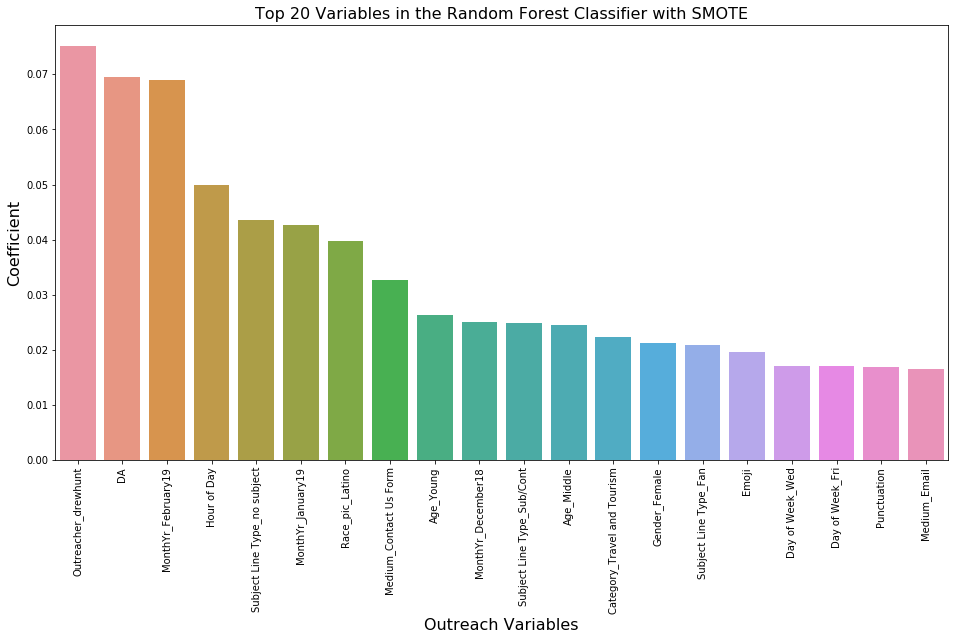

In [118]:
#Creating a data frame that looks at the variables and their coefficients in this model
featuresRF = pd.DataFrame(columns = ['Variable', 'Coef'])
featuresRF['Variable'] = list(x)
featuresRF['Coef'] = abs(rf.feature_importances_)
#featuresRF['Coef'] = clf_rf.feature_importances_
featuresRF.sort_values(by = 'Coef', ascending = False, inplace = True)
featuresRF = featuresRF[0:20]

#Plotting the top 20 variables by their coefficient value
f, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation='90')
sns.barplot(x=featuresRF['Variable'], y = featuresRF['Coef'])
plt.xlabel('Outreach Variables', fontsize=16)
plt.ylabel('Coefficient', fontsize=16)
plt.title('Top 20 Variables in the Random Forest Classifier with SMOTE', fontsize=16)

I believe that Outreacher and MonthYr data are not helping the model, but rather are hurting the model. Workflow has varied between months and some of our Outreachers have been working for a lot longer than others, so the fact that some of these variables are finding their way into the top 20 concerns me. In the next subsection, I am going to recreate this model with these variables excluded from the data. 

<a name="19"></a>

## Re-adjusting data and re-evaluating model

In [119]:
#Reloading data to drop variablers before getting dummies
data = pd.read_excel("file:///Users/codypulsipher/Documents/Pythondocs/StreakDATA.xlsx")

In [120]:
data = data.drop(columns = ['Contact Email Type','Response','Name','Outreacher'])
for index, row in data.iterrows():
    if row.MonthYr == 'April19':
        data.drop(index, inplace = True)

In [121]:
data = pd.get_dummies(data)

In [122]:
march = data.copy()
for index, row in march.iterrows():
    if row.MonthYr_March19 == 0:
        march.drop(index, inplace = True)
print(march.shape)
for index, row in data.iterrows():
    if row.MonthYr_March19 == 1:
        data.drop(index, inplace = True)
print(data.shape)

(272, 79)
(940, 79)


In [123]:
data = data.drop(columns = ['MonthYr_August18', 'MonthYr_December18', 'MonthYr_February19', 
                            'MonthYr_January19', 'MonthYr_November18', 'MonthYr_October18', 
                            'MonthYr_September18','MonthYr_March19'], axis = 1)
march = march.drop(columns = ['MonthYr_August18', 'MonthYr_December18', 'MonthYr_February19', 
                            'MonthYr_January19', 'MonthYr_November18', 'MonthYr_October18', 
                            'MonthYr_September18','MonthYr_March19'], axis = 1)

print(march.shape)
print(data.shape)

(272, 71)
(940, 71)


In [124]:
y = data.Partner
march = march.drop(columns = ['Partner'], axis = 1)
data = data.drop(columns = ['Partner'], axis = 1)
x = data

In [125]:
print(march.shape)
print(data.shape)

(272, 70)
(940, 70)


In [126]:
#training RF model on all of the training data using SMOTE
xSMOTE, ySMOTE = sm.fit_sample(x, y)
rf = RandomForestClassifier()
rf.fit(xSMOTE,ySMOTE)
RFmarch = rf.predict(march)
print('Number of Partners Predicted in March by RF:  ', RFmarch.sum(),'\n')

Number of Partners Predicted in March by RF:   11 



Text(0.5, 1.0, 'Top 20 Variables in the Random Forest Classifier with SMOTE')

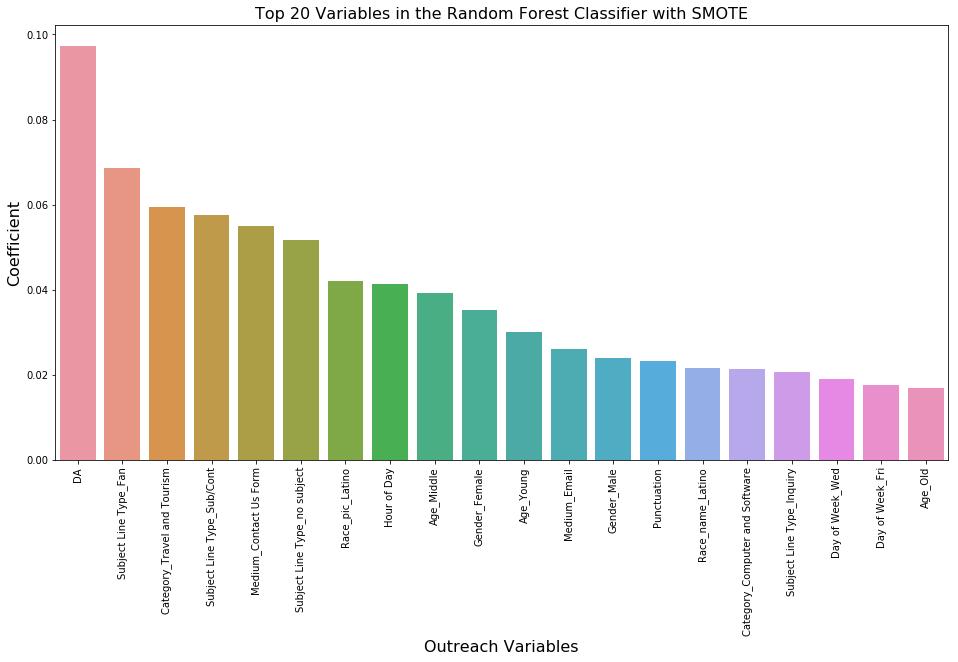

In [127]:
#Creating a data frame that looks at the variables and their coefficients in this model
featuresRF = pd.DataFrame(columns = ['Variable', 'Coef'])
featuresRF['Variable'] = list(x)
featuresRF['Coef'] = abs(rf.feature_importances_)
#featuresRF['Coef'] = clf_rf.feature_importances_
featuresRF.sort_values(by = 'Coef', ascending = False, inplace = True)
featuresRF = featuresRF[0:20]

#Plotting the top 20 variables by their coefficient value
f, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation='90')
sns.barplot(x=featuresRF['Variable'], y = featuresRF['Coef'])
plt.xlabel('Outreach Variables', fontsize=16)
plt.ylabel('Coefficient', fontsize=16)
plt.title('Top 20 Variables in the Random Forest Classifier with SMOTE', fontsize=16)

<a name="21"></a>

## The Final Model... For Now


There is an issue with the 'no subject' subject line type. The issue is that for the most part, when we contact a website through the website (one of the other mediums that isn't 'email') there is no subject line field. These data entries are marked 'no subject'. This model is heavily weighting this variable, but this is not a variable that I think is effective when it comes to the emails that we send. We have sent very few emails without a subject line, and very few have gotten response. I think I will exclude this variable as well and see how it changes the model. 

I also don't think that there is enough variation in our Penname variables. We don't have a variety of ethnicities or ages, so certain races and ages are used very heavily. This would be good to include if we had a better balance in our data. Since we do not have that balance now, I will also remove some of those variables.

In [128]:
data = pd.read_excel("file:///Users/codypulsipher/Documents/Pythondocs/StreakDATA.xlsx")
data = data.drop(columns = ['Contact Email Type','Response','Name','Outreacher','Age','Race_pic','Race_name'])
for index, row in data.iterrows():
    if row.MonthYr == 'April19':
        data.drop(index, inplace = True)
data = pd.get_dummies(data)
march = data.copy()
for index, row in march.iterrows():
    if row.MonthYr_March19 == 0:
        march.drop(index, inplace = True)
print(march.shape)
for index, row in data.iterrows():
    if row.MonthYr_March19 == 1:
        data.drop(index, inplace = True)
print(data.shape)
data = data.drop(columns = ['MonthYr_August18', 'MonthYr_December18', 'MonthYr_February19', 
                            'MonthYr_January19', 'MonthYr_November18', 'MonthYr_October18', 
                            'MonthYr_September18','MonthYr_March19'], axis = 1)
march = march.drop(columns = ['MonthYr_August18', 'MonthYr_December18', 'MonthYr_February19', 
                            'MonthYr_January19', 'MonthYr_November18', 'MonthYr_October18', 
                            'MonthYr_September18','MonthYr_March19'], axis = 1)


data = data.drop(columns = ['Subject Line Type_no subject'], axis = 1)
march = march.drop(columns = ['Subject Line Type_no subject'], axis = 1)

print(march.shape)
print(data.shape)

(272, 68)
(940, 68)
(272, 59)
(940, 59)


In [129]:
y = data.Partner
march = march.drop(columns = ['Partner'], axis = 1)
data = data.drop(columns = ['Partner'], axis = 1)
x = data

In [130]:
#training RF model on all of the training data using SMOTE
xSMOTE, ySMOTE = sm.fit_sample(x, y)
rf = RandomForestClassifier()
rf.fit(xSMOTE,ySMOTE)
RFmarch = rf.predict(march)
print('Number of Partners Predicted in March by RF:  ', RFmarch.sum(),'\n')

Number of Partners Predicted in March by RF:   17 



Text(0.5, 1.0, 'Top 20 Variables in the Random Forest Classifier with SMOTE')

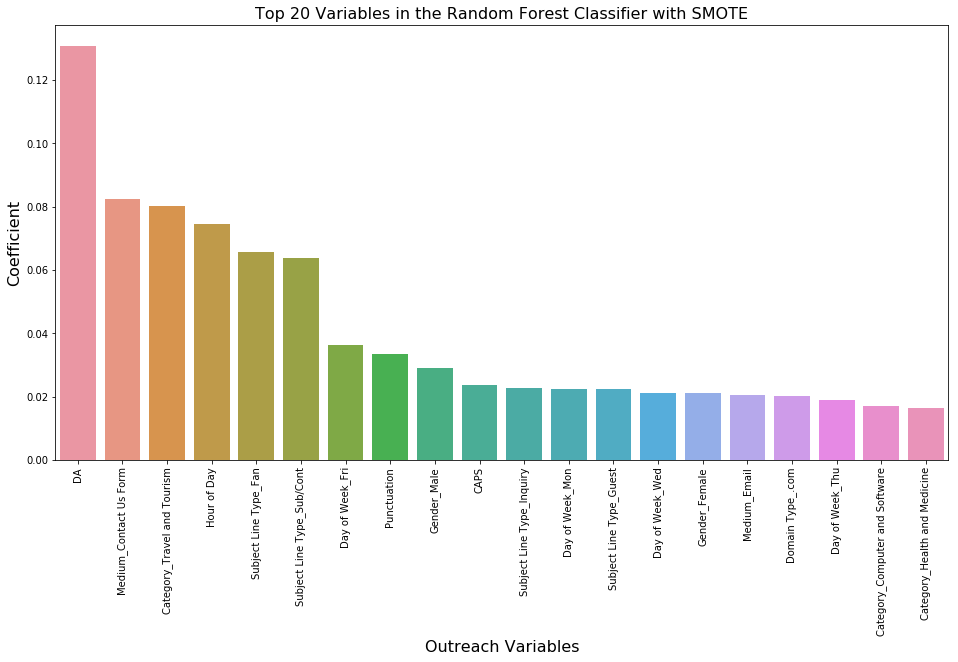

In [131]:
#Creating a data frame that looks at the variables and their coefficients in this model
featuresRF = pd.DataFrame(columns = ['Variable', 'Coef'])
featuresRF['Variable'] = list(x)
featuresRF['Coef'] = abs(rf.feature_importances_)
#featuresRF['Coef'] = clf_rf.feature_importances_
featuresRF.sort_values(by = 'Coef', ascending = False, inplace = True)
featuresRF = featuresRF[0:20]

#Plotting the top 20 variables by their coefficient value
f, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation='90')
sns.barplot(x=featuresRF['Variable'], y = featuresRF['Coef'])
plt.xlabel('Outreach Variables', fontsize=16)
plt.ylabel('Coefficient', fontsize=16)
plt.title('Top 20 Variables in the Random Forest Classifier with SMOTE', fontsize=16)

In [147]:
featuresRF = pd.DataFrame(columns = ['Variable', 'Coef'])
featuresRF['Variable'] = list(x)
#featuresRF['Coef'] = abs(rf.feature_importances_)
featuresRF['Coef'] = rf.feature_importances_
featuresRF.sort_values(by = 'Coef', ascending = False, inplace = True)
featuresRF

,Variable,Coef
0,DA,0.130886
46,Medium_Contact Us Form,0.082455
39,Category_Travel and Tourism,0.080218
5,Hour of Day,0.074632
40,Subject Line Type_Fan,0.065525
44,Subject Line Type_Sub/Cont,0.063817
51,Day of Week_Fri,0.036151
1,Punctuation,0.033307
7,Gender_Male,0.028910
2,CAPS,0.023623


In [133]:
data = pd.read_excel("file:///Users/codypulsipher/Documents/Pythondocs/StreakDATA.xlsx")
data = data.drop(columns = ['Contact Email Type','Response','Name','Outreacher','Age','Race_pic','Race_name'])
for index, row in data.iterrows():
    if row.MonthYr == 'April19':
        data.drop(index, inplace = True)
data = pd.get_dummies(data)
march = data.copy()
for index, row in march.iterrows():
    if row.MonthYr_March19 == 0:
        march.drop(index, inplace = True)
print(march.shape)
for index, row in data.iterrows():
    if row.MonthYr_March19 == 1:
        data.drop(index, inplace = True)
print(data.shape)
data = data.drop(columns = ['MonthYr_August18', 'MonthYr_December18', 'MonthYr_February19', 
                            'MonthYr_January19', 'MonthYr_November18', 'MonthYr_October18', 
                            'MonthYr_September18','MonthYr_March19'], axis = 1)
march = march.drop(columns = ['MonthYr_August18', 'MonthYr_December18', 'MonthYr_February19', 
                            'MonthYr_January19', 'MonthYr_November18', 'MonthYr_October18', 
                            'MonthYr_September18','MonthYr_March19'], axis = 1)


data = data.drop(columns = ['Subject Line Type_no subject'], axis = 1)
march = march.drop(columns = ['Subject Line Type_no subject'], axis = 1)

print(march.shape)
print(data.shape)

(272, 68)
(940, 68)
(272, 59)
(940, 59)


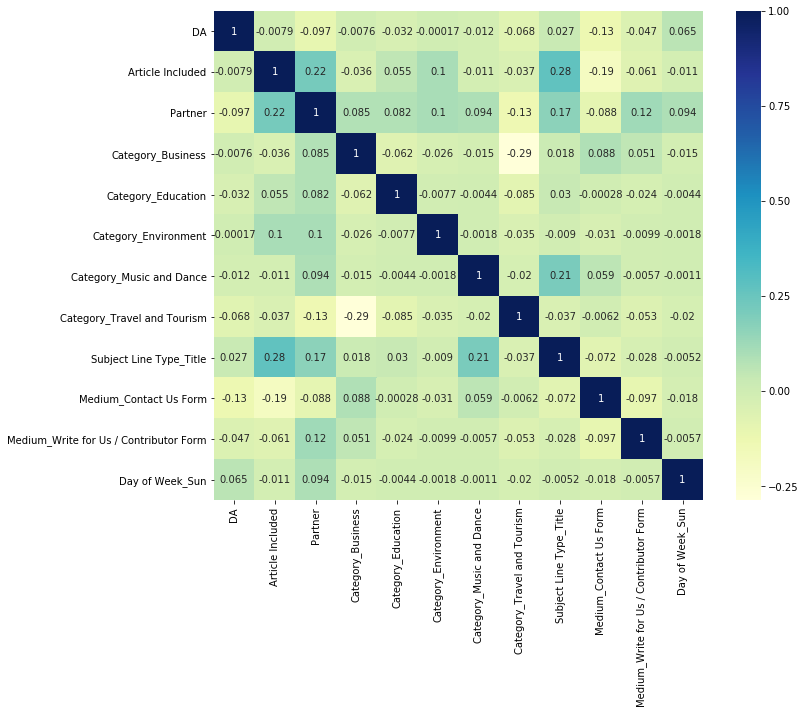

In [134]:
#Now that I can see the impact of the coefficients, I will view the correlation to get an idea of the direction
#Looking at the variables that are most correlated with Partner (Target)
corr_data = data.corr()
highest_corr = corr_data.index[abs(corr_data["Partner"])>0.08]
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(data[highest_corr].corr(), square = True, annot = True, cmap="YlGnBu")

Things are looking pretty good. I am going to settle on this model for now. It makes the most sense with what it is doing with the different variables, how it is weighting them, and the direction those weights seem to be. 

<a name="20"></a>

# Conclusions

Refer to the [presentation](https://docs.google.com/presentation/d/1ssFZia4STmHxf-JaPd1PhY5DkPCC1TWSr1yhXi8WptE/edit#slide=id.p) I made for this project for a visual representation of the conclusions I have drawn.

- **Is the Model Effective?**<br>
The model is very young and will improve as more data is collected. It will also improve as we continue to figure out effective ways to collect data on more variables that we think are good predictors of whether or not an Outreach observation becomes a partner. 
<br><br>
- **What Can We Learn From This Project?**<br>
    - DA is a strong indicator of the difficulty of converting a website into a Partner. This will help us as we take on new clients who may have specific DA requirements for their links. 
    - There is a strong correlation between Article Included and Subject Line_Title with Partner. This is something that we can start doing more often in our Outreach attempts to increase our chances of converting websites into partners. 
    - Hour of Day is a strong predictor of Partner and it is also positively correlated. This tells us that we should be sending our emails later in the day rather than during regular work hours. This could be caused by a number of different things, but the data makes it clear how we should proceed. 
    - Sending follow up emails in the same email thread is INEFFECTIVE. This variable had to be removed from the project because it was too strongly correlated with no responses, but this helped me realize that some email threads might be moved to spam, so sending followups in the same thread is futile. Moving forward, we will send followups in separete threads and might even change the Outreach approach to increase our chances of conversion. 
    - The different categories show stronger correlation with Partner than the other variables. This is very insightful because our clients require different categories for their links. Understanding that some categories are harder than others will help us evaluate our ability to fulfill certain projects. It will also help us understand the kind of expansion we need in our team to do certain things. 
<br><br>
Overall, we have learned that there is a lot to learn from the data. This has been a fruitful project that is well worth our time and resources to continue. As we move forward, the model will become more sophisticated and will be able to teach us even more effectively how we can improve our Outreach efforts. 
<br><br>
- **How Can We Use This Model?**
    - Reporting: This model will help us more accurately report the number of partners we anticipate acquiring from a given month's work. This will help us fill orders and purchase links more effectively, which will save us money and keep our clients happy in the long run. 
    - Forecasting: We can run simulations on the model to figure out how many emails we will need to be sending during certain projects to hit the outcome we need to satisfy a project or client. This will help us figure out Outreach team dynamics and costs. 